# Feature Engineering

### Libraries

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import boxcox
from statsmodels.tsa.seasonal import seasonal_decompose

### Data

In [2]:
# load negative, neutral and positive time series

negative_reviews_per_month = pd.read_csv('data/negative_reviews_per_month.csv', index_col=0, parse_dates=True)
neutral_reviews_per_month = pd.read_csv('data/neutral_reviews_per_month.csv', index_col=0, parse_dates=True)
positive_reviews_per_month = pd.read_csv('data/positive_reviews_per_month.csv', index_col=0, parse_dates=True)

In [3]:
# load sentiment time series

sentiment_per_month = pd.read_csv('data/sentiment_per_month.csv', index_col=0, parse_dates=True)

In [4]:
# load categories time series

sentiment_restaurants_per_month = pd.read_csv('data/sentiment_restaurants_per_month.csv', index_col=0, parse_dates=True)
sentiment_nightlife_per_month = pd.read_csv('data/sentiment_nightlife_per_month.csv', index_col=0, parse_dates=True)
sentiment_breakfast_brunch_per_month = pd.read_csv('data/sentiment_breakfast_brunch_per_month.csv', index_col=0, parse_dates=True)

### Adjustments

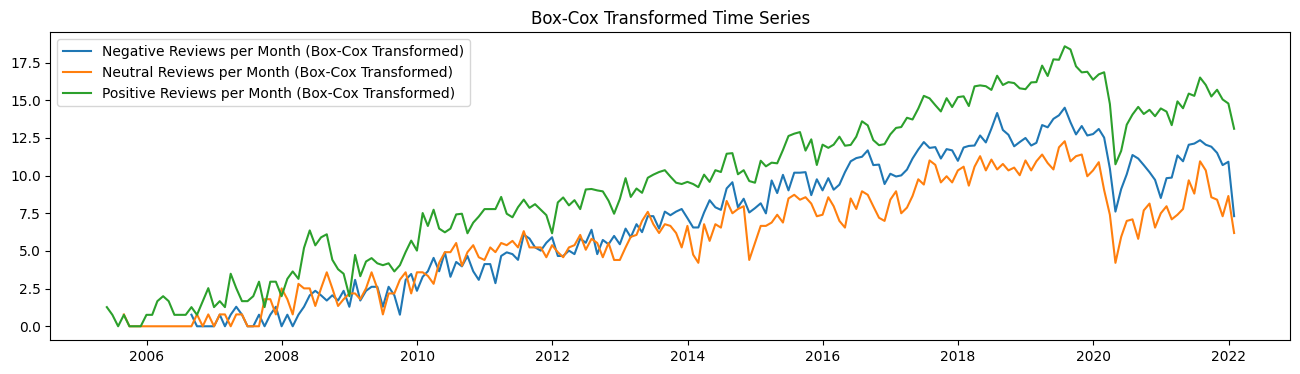

In [5]:
# box-cox transformation for negative, neutral and positive reviews

shift = 1

boxcox_negative_reviews_per_month = negative_reviews_per_month.copy()
shifted_negative_reviews = negative_reviews_per_month['count'] + shift
boxcox_negative_reviews_per_month['count'], _ = boxcox(shifted_negative_reviews)

boxcox_neutral_reviews_per_month = neutral_reviews_per_month.copy()
shifted_neutral_reviews = neutral_reviews_per_month['count'] + shift
boxcox_neutral_reviews_per_month['count'], _ = boxcox(shifted_neutral_reviews)

boxcox_positive_reviews_per_month = positive_reviews_per_month.copy()
shifted_positive_reviews = positive_reviews_per_month['count'] + shift
boxcox_positive_reviews_per_month['count'], _ = boxcox(shifted_positive_reviews)

plt.figure(figsize=(16, 4))
plt.plot(boxcox_negative_reviews_per_month, label='Negative Reviews per Month (Box-Cox Transformed)')
plt.plot(boxcox_neutral_reviews_per_month, label='Neutral Reviews per Month (Box-Cox Transformed)')
plt.plot(boxcox_positive_reviews_per_month, label='Positive Reviews per Month (Box-Cox Transformed)')
plt.title('Box-Cox Transformed Time Series')
plt.legend()
plt.show()

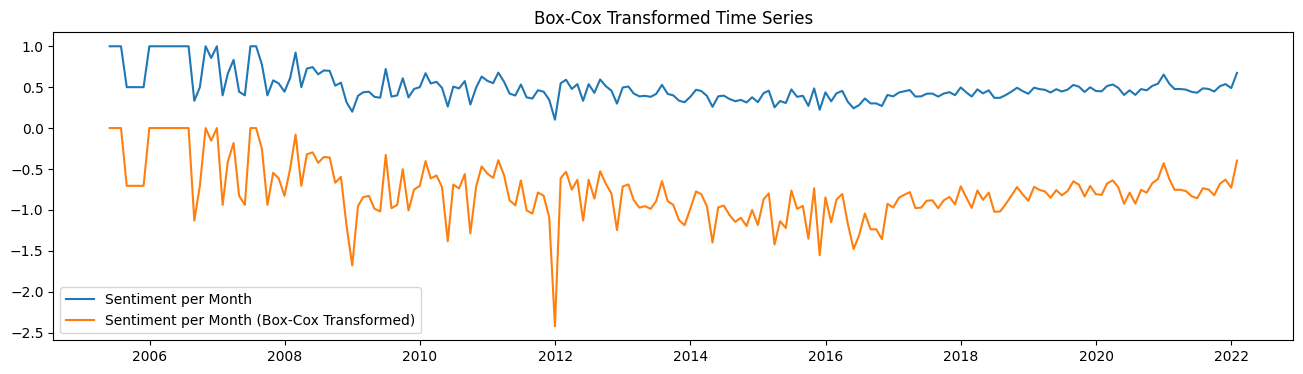

In [6]:
# box-cox transformation for sentiment

boxcox_sentiment_per_month = sentiment_per_month.copy()
boxcox_sentiment_per_month['sentiment'], _ = boxcox(sentiment_per_month['sentiment'])

plt.figure(figsize=(16, 4))
plt.plot(sentiment_per_month, label='Sentiment per Month')
plt.plot(boxcox_sentiment_per_month, label='Sentiment per Month (Box-Cox Transformed)')
plt.title('Box-Cox Transformed Time Series')
plt.legend()
plt.show()   

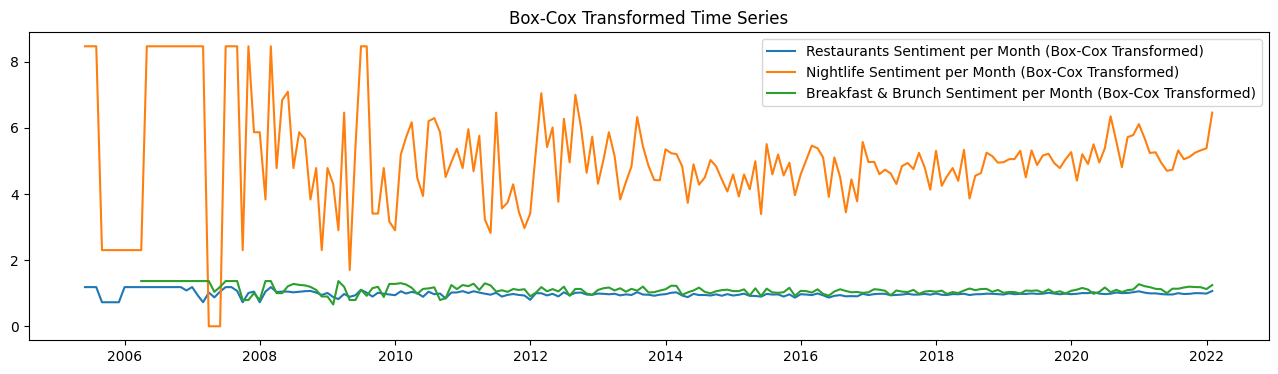

In [9]:
# box-cox transformation for category sentiment

shift = 2

boxcox_sentiment_restaurants_per_month = sentiment_restaurants_per_month.copy()
shifted_sentiment_restaurants = sentiment_restaurants_per_month['sentiment'] + shift
boxcox_sentiment_restaurants_per_month['sentiment'], _ = boxcox(shifted_sentiment_restaurants)

boxcox_sentiment_nightlife_per_month = sentiment_nightlife_per_month.copy()
shifted_sentiment_nightlife = sentiment_nightlife_per_month['sentiment'] + shift
boxcox_sentiment_nightlife_per_month['sentiment'], _ = boxcox(shifted_sentiment_nightlife)

boxcox_sentiment_breakfast_brunch_per_month = sentiment_breakfast_brunch_per_month.copy()
shifted_sentiment_breakfast_brunch = sentiment_breakfast_brunch_per_month['sentiment'] + shift
boxcox_sentiment_breakfast_brunch_per_month['sentiment'], _ = boxcox(shifted_sentiment_breakfast_brunch)

plt.figure(figsize=(16, 4))
plt.plot(boxcox_sentiment_restaurants_per_month, label='Restaurants Sentiment per Month (Box-Cox Transformed)')
plt.plot(boxcox_sentiment_nightlife_per_month, label='Nightlife Sentiment per Month (Box-Cox Transformed)')
plt.plot(boxcox_sentiment_breakfast_brunch_per_month, label='Breakfast & Brunch Sentiment per Month (Box-Cox Transformed)')
plt.title('Box-Cox Transformed Time Series')
plt.legend()
plt.show()

### Decomposition

In [10]:
def decomposition(time_series, label='sentiment', model='additive', freq=12):
    '''
    Decompose a time series into trend, seasonal and residual components.
    '''
    decomposition_ts = time_series.copy()
    decomposition = seasonal_decompose(decomposition_ts[label], model=model, period=freq)
    decomposition_ts['trend'] = decomposition.trend
    decomposition_ts['seasonal'] = decomposition.seasonal
    decomposition_ts['residual'] = decomposition.resid
    return decomposition_ts

In [26]:
def plot_decomposition(data, label='sentiment', title=None):
    '''
    Plot the decomposition of a time series.
    '''
    plt.figure(figsize=(16, 4))
    plt.subplot(411)
    plt.plot(data[label], label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(data['trend'], label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(data['seasonal'], label='Seasonal', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(data['residual'], label='Residual', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()
    if title:
        plt.suptitle(title)
    plt.show()

#### Negative, neutral and positive reviews

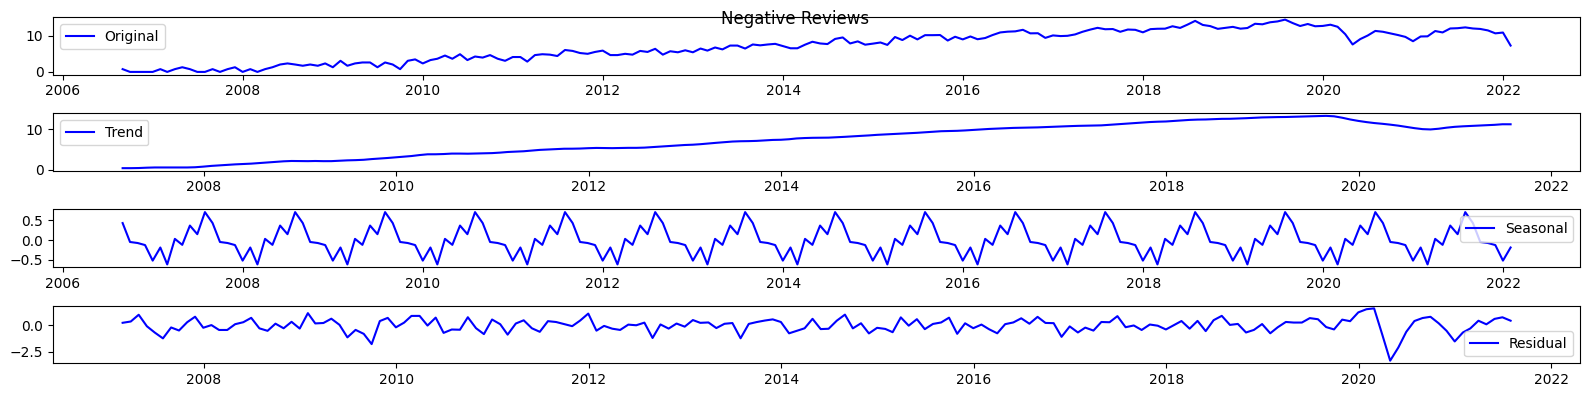

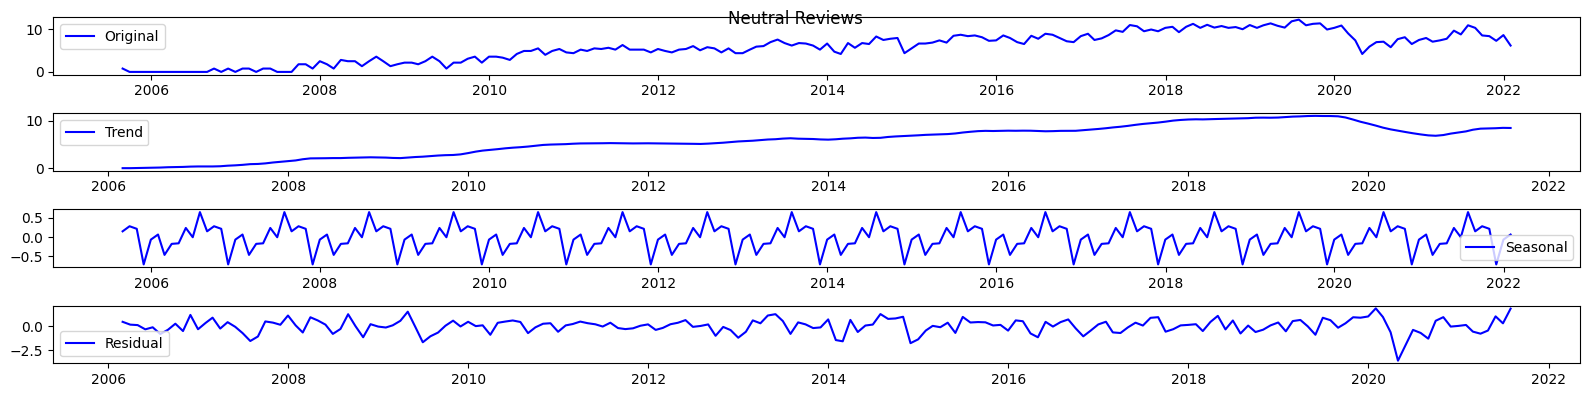

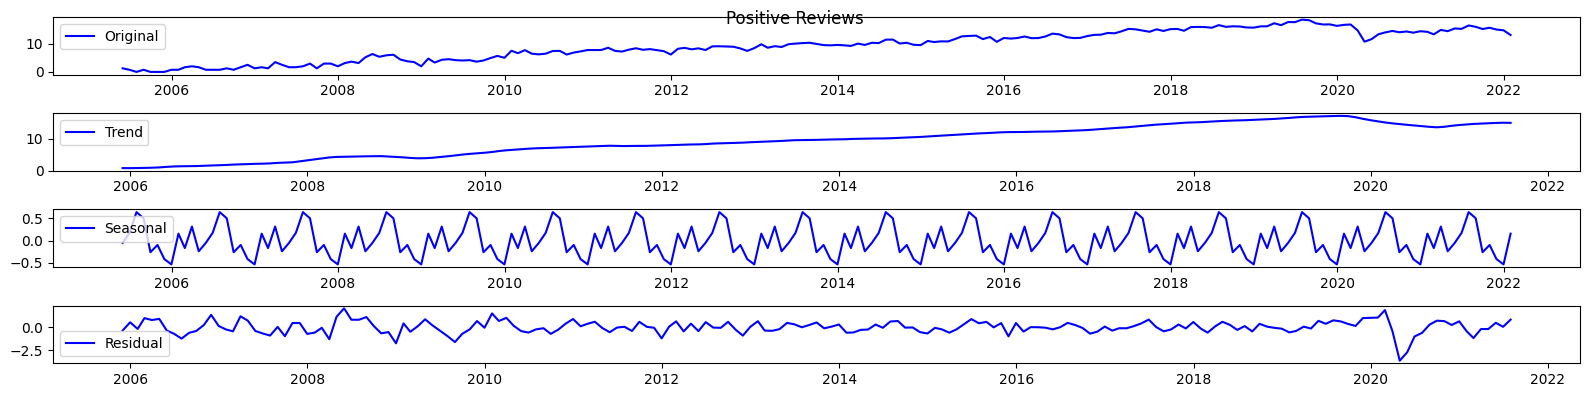

In [27]:
# (box-cox + additive) decomposition for negative, neutral and positive reviews

negative_reviews_per_month_additive = decomposition(boxcox_negative_reviews_per_month, label='count', model='additive')
neutral_reviews_per_month_additive = decomposition(boxcox_neutral_reviews_per_month, label='count', model='additive')
positive_reviews_per_month_additive = decomposition(boxcox_positive_reviews_per_month, label='count', model='additive')

plot_decomposition(negative_reviews_per_month_additive, label='count', title='Negative Reviews')
plot_decomposition(neutral_reviews_per_month_additive, label='count', title='Neutral Reviews')
plot_decomposition(positive_reviews_per_month_additive, label='count', title='Positive Reviews')

In [ ]:
# save negative, neutral and positive reviews time series

negative_reviews_per_month_additive.to_csv('features/negative_reviews_per_month_additive.csv')
neutral_reviews_per_month_additive.to_csv('features/neutral_reviews_per_month_additive.csv')
positive_reviews_per_month_additive.to_csv('features/positive_reviews_per_month_additive.csv')

#### Sentiment

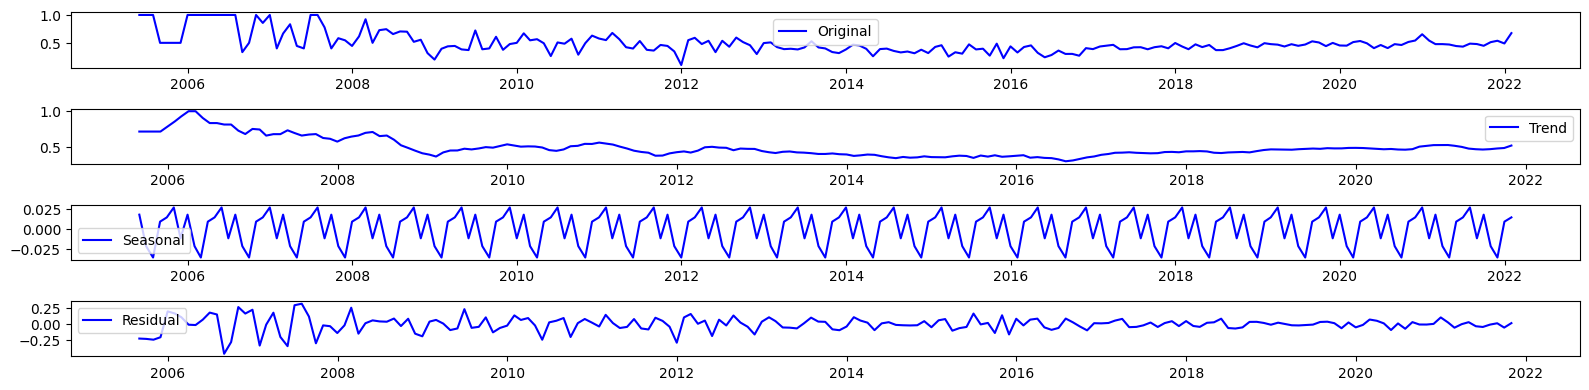

In [28]:
# additive decomposition

sentiment_per_month_additive = decomposition(sentiment_per_month, model='additive', freq=7)

plot_decomposition(sentiment_per_month_additive)

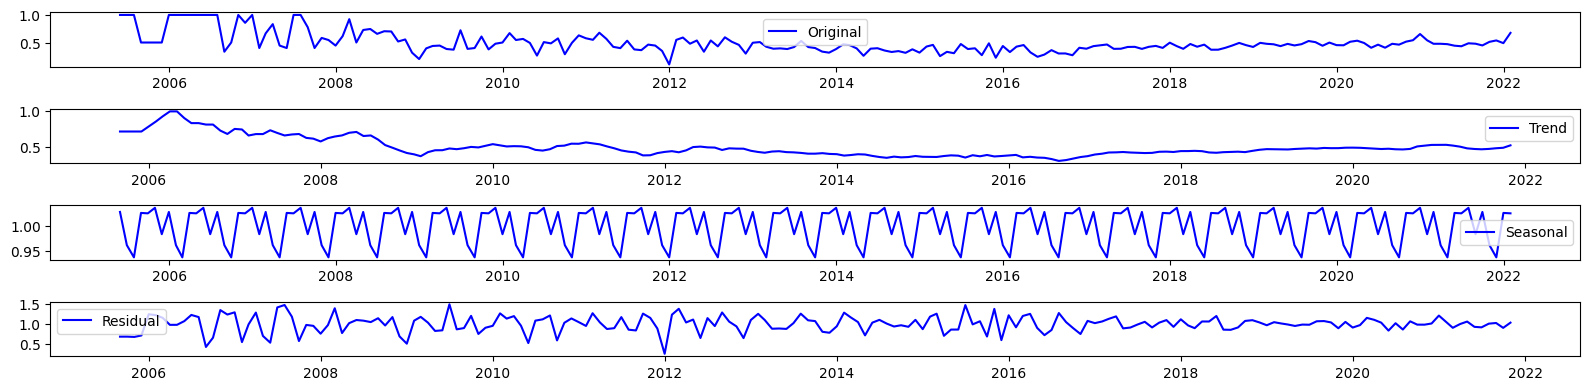

In [29]:
# multiplicative decomposition

sentiment_per_month_multiplicative = decomposition(sentiment_per_month, model='multiplicative', freq=7)

plot_decomposition(sentiment_per_month_multiplicative)

In [30]:
# save sentiment per month decomposed

sentiment_per_month_additive.to_csv('features/sentiment_per_month_additive.csv')

#### Category sentiment

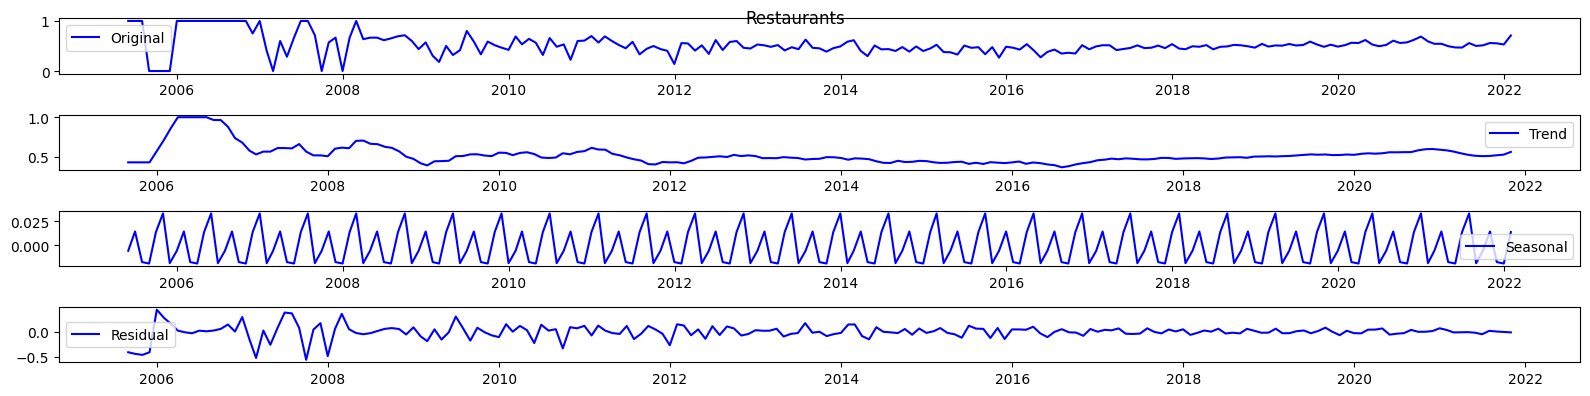

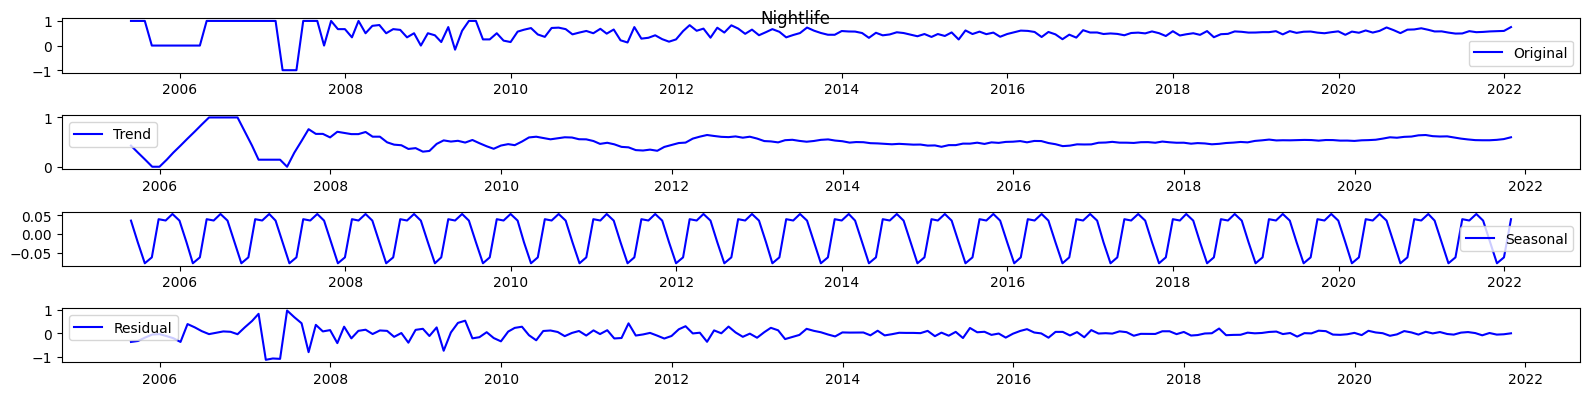

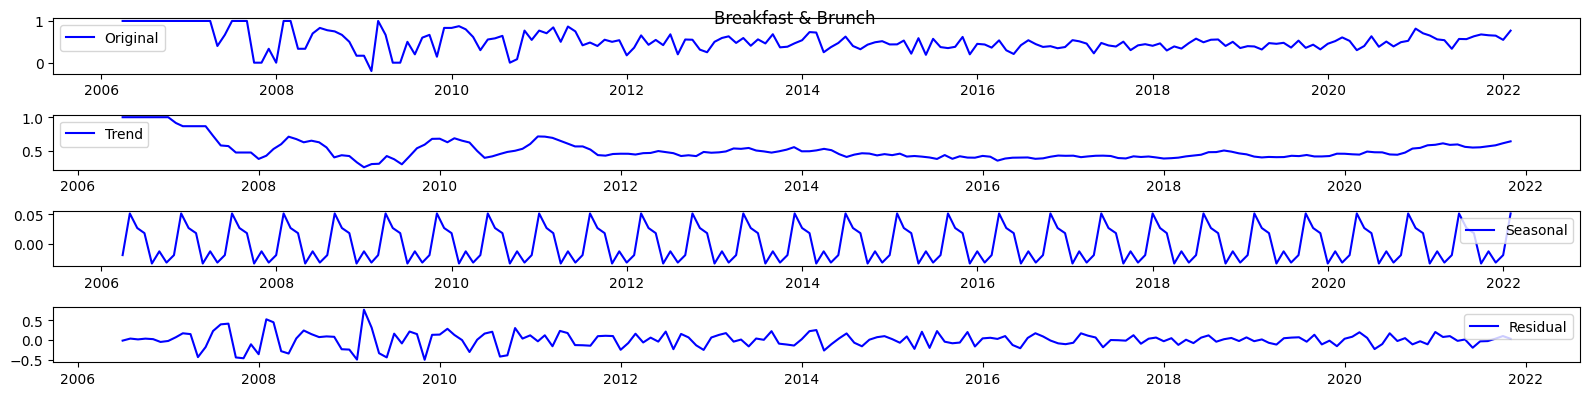

In [31]:
# additive decomposition for categories

sentiment_restaurants_per_month_additive = decomposition(sentiment_restaurants_per_month, model='additive', freq=7)
sentiment_nightlife_per_month_additive = decomposition(sentiment_nightlife_per_month, model='additive', freq=7)
sentiment_breakfast_brunch_per_month_additive = decomposition(sentiment_breakfast_brunch_per_month, model='additive', freq=7)

plot_decomposition(sentiment_restaurants_per_month_additive, title='Restaurants')
plot_decomposition(sentiment_nightlife_per_month_additive, title='Nightlife')
plot_decomposition(sentiment_breakfast_brunch_per_month_additive, title='Breakfast & Brunch')

In [32]:
# save sentiment per month decomposed

sentiment_restaurants_per_month_additive.to_csv('features/sentiment_restaurants_per_month_additive.csv')
sentiment_nightlife_per_month_additive.to_csv('features/sentiment_nightlife_per_month_additive.csv')
sentiment_breakfast_brunch_per_month_additive.to_csv('features/sentiment_breakfast_brunch_per_month_additive.csv')